In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt


# Declaring Global Parameters

In [2]:
a = 15 # FORS Tree Height
# k = 10 # FORS Tree Number
val_arr = []

In [3]:
parameters = {
    "128S" : {
        "n":16,
        "h":66,
        "d":11,
        "k":9,
        "w":128,
        "a":13
    },
    "128F" : {
        "n":16,
        "h":63,
        "d":21,
        "k":19,
        "w":16,
        "a":9
    },
    "192S" : {
        "n":24,
        "h":63,
        "d":11,
        "k":13,
        "w":128,
        "a":15
    },
    "192F" : {
        "n":24,
        "h":63,
        "d":21,
        "k":30,
        "w":16,
        "a":9
    },
    "256S" : {
        "n":32,
        "h":66,
        "d":11,
        "k":19,
        "w":64,
        "a":14
    },
    "256F" : {
        "n":32,
        "h":64,
        "d":16,
        "k":34,
        "w":16,
        "a":10
    },
}

m = b"No one knows the reason for all this, but it is probably quantum. - Pyramids, Terry Pratchett (1989)"

# SPHINCS+ 

In [4]:
from package.sphincs import Sphincs
from package.sphincsc import SphincsC

In [5]:
def SphincsUtil(n, h, d, w, a, k, name, cf=1):
    sphincsc = Sphincs()
    di= {}
    sphincsc.set_n(n)
    sphincsc.set_h(h)
    sphincsc.set_d(d)
    sphincsc.set_w(w)
    sphincsc.set_a(a)
    sphincsc.set_k(k)
    
    start = time.time()
    sk, pk = sphincsc.generate_key_pair()
    end = time.time()
    key_gen_time = end-start
    print("Secret Key Size: ", len(sk))
    print("Public Key Size: ", len(pk))
    print("Time Taken to Generate Keys", key_gen_time)
    di["SK Size"] = len(sk) 
    di["PK Size"] = len(pk)
    di["Key Gen Time"]  = key_gen_time

    try:
    
        start = time.time()
        signature = sphincsc.sign(m, sk)
        end = time.time()
        sign_time = end-start
        print("Time Taken to Sign", sign_time)
        print("Signature Size", len(signature), "bytes")

        start = time.time()
        verify_true = sphincsc.verify(m, signature, pk)
        end = time.time()
        verify_time = end-start
        print("Time Taken to Verify", verify_time)
        print("Is signature correct ? ", verify_true)

        di["Sign Size"] = len(signature)
        di["Sign Time"] = sign_time
        di["Verify Time"] = verify_time
        
    except:
        
        print(name + " Failed")
    
    print("-"*50, "\n")

    return di


In [6]:
def SphincsCUtil(n, h, d, w, a, k, name, cf=1):
    sphincsc = SphincsC()
    di= {}
    sphincsc.set_n(n)
    sphincsc.set_h(h)
    sphincsc.set_d(d)
    sphincsc.set_w(w)
    sphincsc.set_a(a)
    sphincsc.set_k(k)
    sphincsc.set_cf(cf)
    
    start = time.time()
    sk, pk = sphincsc.generate_key_pair()
    end = time.time()
    key_gen_time = end-start
    print("Secret Key Size: ", len(sk))
    print("Public Key Size: ", len(pk))
    print("Time Taken to Generate Keys", key_gen_time)
    di["SK Size"] = len(sk) 
    di["PK Size"] = len(pk)
    di["Key Gen Time"]  = key_gen_time

    try:
    
        start = time.time()
        signature = sphincsc.sign(m, sk)
        end = time.time()
        sign_time = end-start
        print("Time Taken to Sign", sign_time)
        print("Signature Size", len(signature), "bytes")

        start = time.time()
        verify_true = sphincsc.verify(m, signature, pk)
        end = time.time()
        verify_time = end-start
        print("Time Taken to Verify", verify_time)
        print("Is signature correct ? ", verify_true)

        di["Sign Size"] = len(signature)
        di["Sign Time"] = sign_time
        di["Verify Time"] = verify_time
        
    except Exception as e:
        
        print(name + " Failed")
        print(e)
    
    print("-"*50, "\n")

    return di


## SPHINCS+128S

In [7]:
models = ["SPHINCS+", "SPHINCS+C1", "SPHINCS+C2", "SPHINCS+C3", "SPHINCS+C4"]
parameter_names = list(parameters.keys())

for cf, name in enumerate(models):
    print(cf)
    if cf == 0:
        for param_set in parameter_names:
            print(name + ' ' + param_set)
            param = parameters[param_set]
            d = SphincsUtil(**param, name = name + ' ' + param_set)
            d["Name"] = name + ' ' + param_set
            val_arr.append(d)
            print("-"*50, "\n")
    else:
        for param_set in parameter_names:
            print(name + ' ' + param_set)
            param = parameters[param_set]
            d = SphincsCUtil(**param, cf=cf, name = name + ' ' + param_set)
            d["Name"] = name + ' ' + param_set
            val_arr.append(d)
    

0
SPHINCS+ 128S
Secret Key Size:  64
Public Key Size:  32
Time Taken to Generate Keys 0.13248300552368164
Time Taken to Sign 2.976926803588867
Signature Size 9248 bytes
Time Taken to Verify 0.010487556457519531
Is signature correct ?  True
-------------------------------------------------- 

-------------------------------------------------- 

SPHINCS+ 128F
Secret Key Size:  64
Public Key Size:  32
Time Taken to Generate Keys 0.017304658889770508
Time Taken to Sign 0.5519957542419434
Signature Size 15824 bytes
Time Taken to Verify 0.021621227264404297
Is signature correct ?  True
-------------------------------------------------- 

-------------------------------------------------- 

SPHINCS+ 192S
Secret Key Size:  96
Public Key Size:  48
Time Taken to Generate Keys 0.09800410270690918
Time Taken to Sign 9.809926748275757
Signature Size 19800 bytes
Time Taken to Verify 0.016952991485595703
Is signature correct ?  False
-------------------------------------------------- 

--------------

Time Taken to Sign 1.973151683807373
Signature Size 44954 bytes
Time Taken to Verify 0.03188133239746094
Is signature correct ?  True
-------------------------------------------------- 

3
SPHINCS+C3 128S
Value of n changed
16
Recalculation called
Value of h changed
66
Recalculation called
Value of d changed
11
Recalculation called
Value of w changed
128
Recalculation called
Value of a changed
13
Recalculation called
Value of  changed
9
Recalculation called
Value of cf changed
3
Recalculation called
Secret Key Size:  64
Public Key Size:  32
Time Taken to Generate Keys 0.4448418617248535
SPHINCS+C3 128S Failed
negative shift count
-------------------------------------------------- 

SPHINCS+C3 128F
Value of n changed
16
Recalculation called
Value of h changed
63
Recalculation called
Value of d changed
21
Recalculation called
Value of w changed
16
Recalculation called
Value of a changed
9
Recalculation called
Value of  changed
19
Recalculation called
Value of cf changed
3
Recalculation c

In [8]:
df = pd.DataFrame(val_arr)

In [9]:
df.to_csv("result.csv", encoding='utf-8', index=False)

In [10]:
df.head(len(val_arr))

,SK Size,PK Size,Key Gen Time,Sign Size,Sign Time,Name
0,64,32,0.132483,9248.0,2.976927,SPHINCS+ 128S
1,64,32,0.017305,15824.0,0.551996,SPHINCS+ 128F
2,96,48,0.098004,19800.0,9.809927,SPHINCS+ 192S
3,96,48,0.024965,34440.0,0.824621,SPHINCS+ 192F
4,128,64,0.256315,34848.0,9.218449,SPHINCS+ 256S
5,128,64,0.063822,48352.0,1.775085,SPHINCS+ 256F
6,64,32,0.563339,NaN,NaN,SPHINCS+C1 128S
7,64,32,0.018062,14684.0,0.616125,SPHINCS+C1 128F
8,96,48,0.413449,NaN,NaN,SPHINCS+C1 192S
9,96,48,0.025934,32717.0,1.003702,SPHINCS+C1 192F


<AxesSubplot:xlabel='Name'>

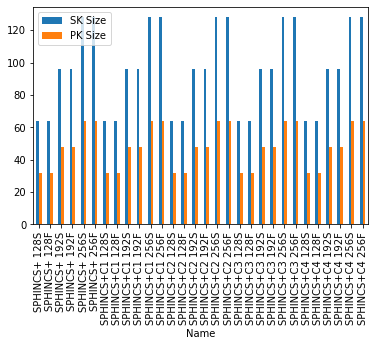

In [11]:
df.plot(x="Name", y=["SK Size","PK Size"], kind="bar")


In [17]:
df.sort_values(by=['Sign Size', 'Sign Time'], inplace=True)

<AxesSubplot:xlabel='Name'>

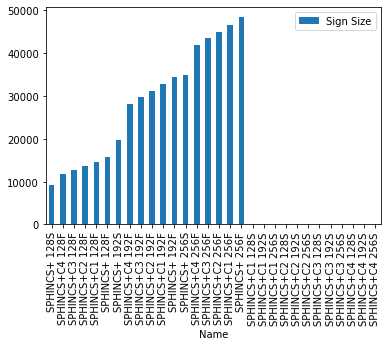

In [18]:
df.plot(x="Name", y=["Sign Size"], kind="bar")

<AxesSubplot:xlabel='Name'>

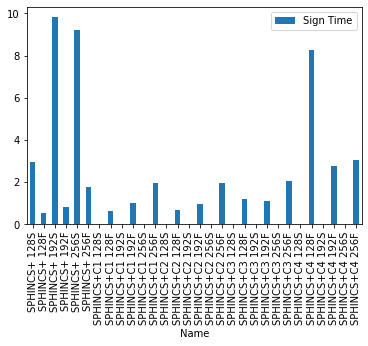

In [13]:
df.plot(x="Name", y=["Sign Time"], kind="bar")

In [14]:
df.plot(x="Name", y=["Verify Time"], kind="bar")

KeyError: "None of [Index(['Verify Time'], dtype='object')] are in the [columns]"